In [1]:
import numpy as np
import os, sys

In [ ]:
train_data_root = '/data/fz20/dataset/ABC/train_final'
val_data_root = '/data/fz20/dataset/ABC/val_final'

In [ ]:
train_list = sorted(os.listdir(train_data_root))
val_list = sorted(os.listdir(val_data_root))

In [ ]:
# 计算模型实例label的最大值
label_max = 0
for i in train_list:
    data_path = os.path.join(train_data_root, i)
    data = np.load(data_path)
    coord, normals, boundary, label, semantic, param, F, edges = data['V'],data['N'],data['B'],data['L'],data['S'],data['T_param'],data['F'],data['edges']
    if np.max(label) > label_max:
        label_max = np.max(label)
label_max

In [10]:
# 计算含有B样条曲面的模型数量
with_bspline_model = 0
b_spline = [0,6,7,9,2,8]
for i in val_list:
    data_path = os.path.join(val_data_root, i)
    data = np.load(data_path)
    coord, normals, boundary, label, semantic, param, F, edges = data['V'],data['N'],data['B'],data['L'],data['S'],data['T_param'],data['F'],data['edges']
    for num in b_spline:
        if num in semantic:
            with_bspline_model += 1
            break
with_bspline_model

285

In [6]:
data = np.load('/data/fz20/dataset/ABC/val_final/00000060_767e4372b5f94a88a7a17d90.npz')
coord, normals, boundary, label, semantic, param, F, edges = data['V'],data['N'],data['B'],data['L'],data['S'],data['T_param'],data['F'],data['edges']
# 写入ply文件
import open3d as o3d
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(coord)
pcd.normals = o3d.utility.Vector3dVector(normals)
o3d.io.write_point_cloud('test.ply', pcd)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


True

In [3]:
abc = '/data/fz20/dataset/ABC/val_final/00000065_767e4372b5f94a88a7a17d90.npz'
abc_dict = np.load(abc)
for key, value in abc_dict.items():
    print(key, value.shape)

V (18746, 3)
N (18746, 3)
B (18746,)
L (18746,)
S (18746,)
T_param (18746, 22)
F (37500, 3)
edges (18746, 47)


In [5]:
abc_old = '/data/fz20/dataset/ABC-old/ABC/val_final/00000065_767e4372b5f94a88a7a17d90.npz'
abc_old_dict = np.load(abc_old)
for key, value in abc_old_dict.items():
    print(key, value.shape)

V (18746, 3)
N (18746, 3)
B (18746,)
L (18746,)
S (18746,)
T_param (18746, 22)
F (37500, 3)


In [4]:
abc_old_edges = '/data/fz20/dataset/ABC-old/ABC_edges/val_final/00000065_767e4372b5f94a88a7a17d90.npz'
abc_old_edges_dict = np.load(abc_old_edges, allow_pickle=True)
for key, value in abc_old_edges_dict.items():
    print(key, value.shape)

V (18746, 3)
N (18746, 3)
B (18746,)
L (18746,)
S (18746,)
T_param (18746, 22)
F (37500, 3)
edges (18746,)


In [5]:
cad_root = '/data1/fz20/dataset/sp_dataset/val_final/00000006_d4fe04f0f5f84b52bd4f10e4.npz'
cad_dict = np.load(cad_root)
# for key, value in cad_dict.items():
#     print(key, value.shape)
v, semantic = cad_dict['V'], cad_dict['semantic']
# 可视化语义标签
import open3d as o3d
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(v)
colors = np.random.uniform(0, 1, size=(len(v), 3))
pcd.colors = o3d.utility.Vector3dVector(colors[semantic])
o3d.io.write_point_cloud('test-semantic.ply', pcd)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


True

In [40]:
import numpy as np
import open3d as o3d
import os
import h5py

object_label = {
            0: [0   ,   0,   0], #unlabelled .->. black
            1: [0,255,0], #'ceiling' .-> .green 天花板
            2: [0,0,255], #'floor' .-> . blue   地板
            3: [0,255,255], #'wall'  ->  Cyan(青色) 墙
            4: [255,0,255], #'column'  ->  Fuchsia（紫红色）    柱子
            5: [255,255,0], #'beam'  ->  yellow 梁
            6: [100,100,255], #'window'  ->  Baby blue（宝宝蓝）    窗户
            7: [200,200,100], #'door'   ->  Olive green（橄榄绿）   门
            8: [170,120,200], #'table'  ->  Lavender（薰衣草色）    桌子
            9: [255,0,0], #'chair'  ->  red 椅子
            10:[10,200,100], #'bookcase'  ->  Forest green（森林绿） 书架
            11:[200,100,100], #'sofa'  ->  Crimson（绯红色）    沙发
            12: [200,200,200], #'board'   ->  Light gray（浅灰色）  黑板
            13: [50,50,50], #'clutter'  ->  Dark gray（深灰色）  杂乱的东西
        }
color_map = [
        {"label": "ceiling","id": 1,"color": [152,223,138]}, 
        {"label": "floor","id": 2,"color": [174,199,232]},
        {"label": "wall","id": 3,"color": [255,127,14]},  
        {"label": "beam","id": 4,"color": [91,163,138]}, 
        {"label": "column","id": 5,"color": [255,187,120]},
        {"label": "window","id": 6,"color": [188,189,34]},
        {"label": "door","id": 7,"color": [140,86,75]}, 
        {"label": "table","id": 8,"color": [255,152,150]},
        {"label": "chair","id": 9,"color": [214,39,40]}, 
        {"label": "sofa","id": 10,"color": [197,176,213]},
        {"label": "bookcase","id": 11,"color": [196,156,148]},
        {"label": "board","id": 12,"color": [23,190,207]}, 
        {"label": "clutter","id": 13,"color": [112,128,144]}
]
write_root = '/data1/fz20/dataset/s3dis_visual/sem'
data_root = '/data/fz20/dataset/S3DIS/Stanford3dDataset_v1.2_Aligned_Version/features_supervision'
data_list = sorted(os.listdir(data_root))
for i in data_list:
    data_path = os.path.join(data_root, i)
    file_list = sorted(os.listdir(data_path))
    for j in file_list:
        file_path = os.path.join(data_path, j)
        data = h5py.File(file_path, 'r')
        xyz = np.array(data['xyz'], dtype='float32')
        rgb = np.array(data['rgb'], dtype='float32')
        labels = np.array(data['labels']).squeeze()
        pcd = o3d.geometry.PointCloud()
        pcd.points = o3d.utility.Vector3dVector(xyz)
        # pcd.colors = o3d.utility.Vector3dVector(rgb / 255)
        sem_colors = np.zeros((len(xyz), 3))
        labels = np.argmax(labels, axis=1)
        # labels = labels[:, 1:].argmax(axis=1)
        for k in range(14):
            sem_colors[labels == k] = object_label[k]
        pcd.colors = o3d.utility.Vector3dVector(sem_colors / 255)
        if not os.path.exists(os.path.join(write_root, i)):
            os.makedirs(os.path.join(write_root, i))
        o3d.io.write_point_cloud(os.path.join(write_root, i, j)[:-3] + '_sem.ply', pcd)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


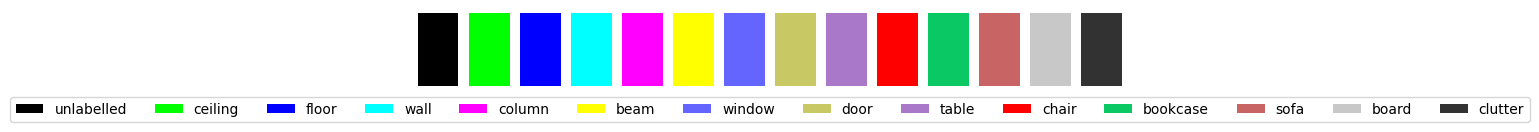

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# 生成13个随机颜色和名称
object_label = {
            0: [0   ,   0,   0], #unlabelled .->. black
            1: [0,255,0], #'ceiling' .-> .green
            2: [0,0,255], #'floor' .-> . blue
            3: [0,255,255], #'wall'  ->  Cyan(青色)
            4: [255,0,255], #'column'  ->  Fuchsia（紫红色）
            5: [255,255,0], #'beam'  ->  yellow
            6: [100,100,255], #'window'  ->  Baby blue（宝宝蓝）
            7: [200,200,100], #'door'   ->  Olive green（橄榄绿）
            8: [170,120,200], #'table'  ->  Lavender（薰衣草色）
            9: [255,0,0], #'chair'  ->  red
            10:[10,200,100], #'bookcase'  ->  Forest green（森林绿）
            11:[200,100,100], #'sofa'  ->  Crimson（绯红色）
            12: [200,200,200], #'board'   ->  Light gray（浅灰色）
            13: [50,50,50], #'clutter'  ->  Dark gray（深灰色）
        }
colors = np.zeros((14, 3))
for i in range(14):
    colors[i] = object_label[i]
colors = np.array(colors) / 255
names = ['unlabelled', 'ceiling', 'floor', 'wall', 'column', 
         'beam', 'window', 'door', 'table', 'chair', 
         'bookcase', 'sofa', 'board', 'clutter']

# 创建图例
fig, ax = plt.subplots(figsize=(10, 1))
for i in range(14):
    ax.bar(i, 1, color=colors[i], label=names[i])

# 关闭坐标轴
ax.set_axis_off()

# 添加图例
plt.legend(loc='center', ncol=14, bbox_to_anchor=(0.5, -0.3))

# 保存图像
plt.savefig('semseg_color.png', dpi=300, bbox_inches='tight')

In [ ]:
import h5py
import numpy as np
import os

count = 0
file_list = sorted(os.listdir('/data1/fz20/dataset/sp_s3dis_dataset/Area_1'))
# file_dir = '/data1/fz20/dataset/sp_s3dis_dataset/Area_1/hallway_1.h5'
for i in file_list:
    file_dir = os.path.join('/data1/fz20/dataset/sp_s3dis_dataset/Area_1', i)
    data = h5py.File(file_dir, 'r')
    T_param = np.array(data['T_param'])
    # print(T_param[:, 15:])
    if False in (T_param[:, 15:] == 0):
        count += 1

print(count)

In [6]:
# 测试vkitti数据集

import numpy as np
import open3d as o3d

kitti_1 = np.load('/data1/fz20/dataset/sp_vkitti_dataset/vkitti3d_dataset_v1.0/data/01/0001_00000.npy')
xyz = kitti_1[:, :3]
rgb = kitti_1[:, 3:6]
label = kitti_1[:, 6].astype(np.int32)
colors = np.random.uniform(0, 1, size=(len(xyz), 3))

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
pcd.colors = o3d.utility.Vector3dVector(colors[label])
o3d.io.write_point_cloud('test-sem.ply', pcd)

True

In [9]:
import os 
import shutil

process_root = '/data1/fz20/dataset/S3DIS/Stanford3dDataset_v1.2_Aligned_Version/superpoint_graphs_ours'

path = os.path.join(process_root, 'Area_5/')
# target_path = os.path.join(process_root, 'Area_5/')
for fname in os.listdir(path):
    if fname.startswith('Area_5_'):
        # shutil.move(path+fname, target_path+fname[7:])
        os.rename(path+fname, path+fname[12:])

In [6]:
import numpy as np
import h5py

data = h5py.File('/data1/fz20/dataset/S3DIS/Stanford3dDataset_v1.2_Aligned_Version/features_supervision/Area_1/conferenceRoom_1.h5', 'r')
print(data.keys())
print(data['labels'].shape)
print(np.array(data['labels']).max())
# # components = data['components']
# numc = len(data['components'].keys())
# for c in range(numc):
#     idx = data['components/{:d}'.format(c)][:].flatten()

# data['in_component']

<KeysViewHDF5 ['elevation', 'geof', 'is_transition', 'labels', 'objects', 'rgb', 'source', 'target', 'target_local_geometry', 'xyn', 'xyz']>
(134536, 14)
36
